## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("telecom_churn.csv")
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [3]:
df = data.copy()

In [4]:
# ваш код здесь
df = df.drop(columns=['State'])

# Кодирование International plan и Voice mail plan
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Перевод целевой переменной (Churn) в числа
df['Churn'] = df['Churn'].astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [6]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [7]:
# ваш код здесь
X = df.drop(columns=['Churn'])
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [8]:
# ваш код здесь
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

не является

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [9]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [10]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [11]:
# ваш код здесь
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
logreg = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [14]:
from sklearn.metrics import roc_auc_score

# ваш код здесь

probs_logreg = logreg.predict_proba(X_test)[:, 1]
probs_svc = svc.predict_proba(X_test)[:, 1]

roc_auc_logreg = roc_auc_score(y_test, probs_logreg)
roc_auc_svc = roc_auc_score(y_test, probs_svc)

print(f"ROC-AUC для Logistic Regression: {roc_auc_logreg}")
print(f"ROC-AUC для SVC: {roc_auc_svc}")

ROC-AUC для Logistic Regression: 0.828242935594161
ROC-AUC для SVC: 0.7401816386647192


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

probs_dtc = dtc.predict_proba(X_test)[:, 1]
roc_auc_dtc = roc_auc_score(y_test, probs_dtc)

print(f"ROC-AUC для DecisionTreeClassifier: {roc_auc_dtc}")

ROC-AUC для DecisionTreeClassifier: 0.8344648350482656


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [16]:
# ваш код здесь
X1 = df.drop(columns=['Churn'])
y1 = df['Churn']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)

probs_dtc = dtc.predict_proba(X_test1)[:, 1]
roc_auc_dtc = roc_auc_score(y_test1, probs_dtc)

print(f"ROC-AUC для DecisionTreeClassifier: {roc_auc_dtc}")

ROC-AUC для DecisionTreeClassifier: 0.8333020538388101


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Это не критично, но маштабировать все равно стоит

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [17]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
param_grid_logreg = {'C': np.linspace(0.1, 10, 20)}

logreg_model = LogisticRegression()
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, scoring='roc_auc', cv=5)

grid_search_logreg.fit(X_train, y_train)

print("Лучшие параметры для логистической регрессии:", grid_search_logreg.best_params_)

probs_logreg = grid_search_logreg.predict_proba(X_test)[:, 1]

roc_auc_logreg = roc_auc_score(y_test, probs_logreg)
print(f"ROC-AUC для логистической регрессии: {roc_auc_logreg}")

Лучшие параметры для логистической регрессии: {'C': 1.6631578947368424}
ROC-AUC для логистической регрессии: 0.8282674151985704


In [18]:
param_grid_tree = {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']}

tree_model = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, scoring='roc_auc', cv=5)

grid_search_tree.fit(X_train, y_train)

print("Лучшие параметры для решающего дерева:", grid_search_tree.best_params_)

probs_tree = grid_search_tree.predict_proba(X_test)[:, 1]

roc_auc_tree = roc_auc_score(y_test, probs_tree)
print(f"ROC-AUC для решающего дерева: {roc_auc_tree}")

Лучшие параметры для решающего дерева: {'criterion': 'gini', 'max_depth': 5}
ROC-AUC для решающего дерева: 0.9083442811564165


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

С решением задачи лучше всего по метрике roc-auc справилась модель решающего дерева 

Нарисуйте roc-кривую для наилучшей модели.

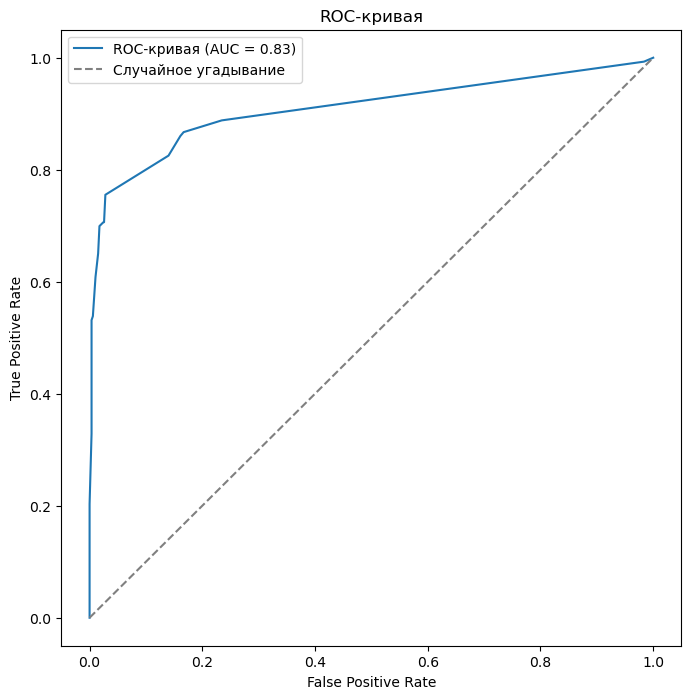

In [20]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь
probs_best_model = grid_search_tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs_best_model)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайное угадывание')
plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [21]:
# ваш код здесь
roc_auc_difference = roc_auc_tree - roc_auc_logreg

print(f"ROC-AUC для логистической регрессии: {roc_auc_logreg}")
print(f"ROC-AUC для решающего дерева: {roc_auc_tree}")
print(f"Разница в ROC-AUC между двумя моделями: {roc_auc_difference:.4f}")

ROC-AUC для логистической регрессии: 0.8282674151985704
ROC-AUC для решающего дерева: 0.9083442811564165
Разница в ROC-AUC между двумя моделями: 0.0801


Качество предсказания на тестовых данных отличаются сильно. Оба модели показывают большие показатели ROC-AUC, но разница в 8% это довольно таки много

In [23]:
# ваш код здесь
logreg_model = LogisticRegression(C=1.6631578947368424)
dtc_model = DecisionTreeClassifier(criterion='gini', max_depth=5)

logreg_model.fit(X_train, y_train)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
feature_importances_logreg = np.abs(logreg_model.coef_[0])
feature_importances_tree = dtc_model.feature_importances_
feature_names = X.columns

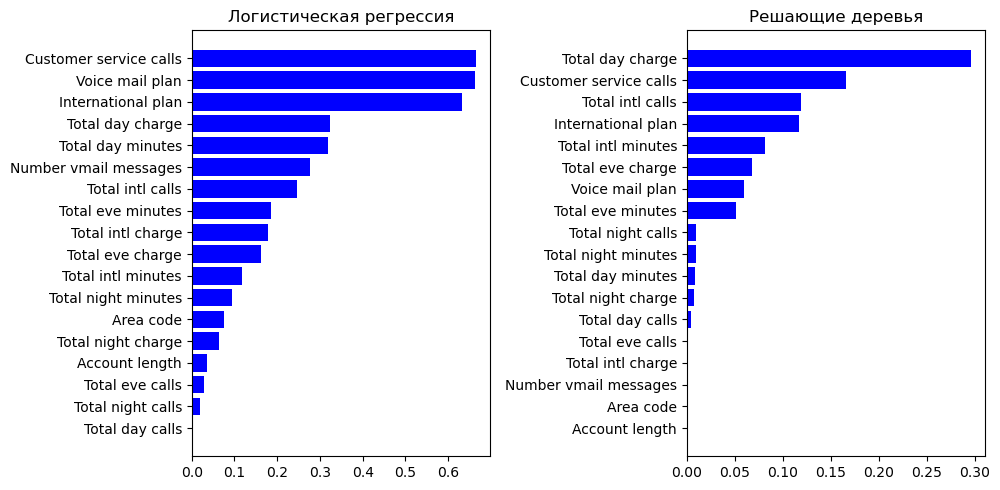

In [38]:
indices_logreg = np.argsort(feature_importances_logreg)
indices_tree = np.argsort(feature_importances_tree)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.barh(range(len(indices_logreg)), feature_importances_logreg[indices_logreg], color='b', align='center')
plt.yticks(range(len(indices_logreg)), [feature_names[i] for i in indices_logreg])
plt.title('Логистическая регрессия')

plt.subplot(132)
plt.barh(range(len(indices_tree)), feature_importances_tree[indices_tree], color='b', align='center')
plt.yticks(range(len(indices_tree)), [feature_names[i] for i in indices_tree])
plt.title('Решающие деревья')

plt.tight_layout()
plt.show()

In [39]:
top_features_logreg = np.argsort(feature_importances_logreg)[-3:]
top_features_tree = np.argsort(feature_importances_tree)[-3:]

print("Три самых важных признака для Логистической регрессии:", feature_names[top_features_logreg])
print("Три самых важных признака для модели решающего дерева:", feature_names[top_features_tree])

Три самых важных признака для Логистической регрессии: Index(['International plan', 'Voice mail plan', 'Customer service calls'], dtype='object')
Три самых важных признака для модели решающего дерева: Index(['Total intl calls', 'Customer service calls', 'Total day charge'], dtype='object')


У признаков разные значения важности для разных моделей, где то есть схожости но они не совпадают

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

Данные не являются сбалансированными. Некоторые признаки важнее других что мы можем увидить на графике

После подбора гиперпараметров с точки зрения метрики roc-auc лучше всего решает задачу модель решающего дерева - 0,908 по roc-auc

Признаки не одинаково важны для моделей. Причиной этому может служить то что модели по разному относятся к решению задачи, и выбор важности признаков тоже является разным